In [8]:
import numpy as np
import gym

In [9]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", render_mode="human", is_slippery=False)
env.action_space.seed(42)

[42]

# Temporal Differences Method

This method combines the best of both worlds between Monte Carlo and Dynamic Programming. It uses bootstrapping and constant policy iteration! So, we don't have to wait until the end of the episode to update the q-values

* Temporal Difference

Temporal difference is all about updating the q-values with $\hat{G}$ which is the return estimate defined as:

$$\hat{G} = \begin{align*}
                r_t + \gamma Q(s_{t+1},a_{t+1})
            \end{align*}$$

This is an estimate of the return $\hat{G}$ that allows for updating Q-values before the end of the episode which means that future values will also use better estimates.

$$\text{temporal difference} = \begin{align*}
    \hat{G} - Q(s,a)
    \end{align*}$$

* SARSA

SARSA represents the new updating method for q-values at each step:

$$
        \begin{align*}
            Q(s,a) =  Q(s,a) + \alpha(r+\gamma Q(s',a')-Q(s,a)) \\ 
            \implies (1-\alpha)Q(s,a) + \alpha(r+\gamma Q(s',a'))
        \end{align*}
$$

all the letters in the last equation read (SARS'A'). $a'$ is chosen using an $\epsilon$-greedy policy (which could lead to the best next value or just a random one)

* Experience Learning

As we've talked about before, this iterative methods learn from new experiences (episodes). So, we need a way to help the value converge to the optimal one, i.e, limit the experience learning so that we don't end up jumping around an optimal value. This is $\alpha$'s job

* Q-learning

It's the same thing as SARSA, but instead it's off-policy and the temporal differences with $\pi(S)$ are always compared to the best next state value. This allows for faster convergion.

$$
        \begin{align*}
            Q(s,a) =  Q(s,a) + \alpha(r+\gamma Q_*(s',a')-Q(s,a)) \\ 
            \implies (1-\alpha)Q(s,a) + \alpha(r+\gamma Q_*(s',a'))
        \end{align*}
$$


In [37]:
def show_optimal_policy(action_values):
    if np.argmax(action_values) == 0:
        return "L"
    elif np.argmax(action_values) == 1:
        return "D"
    elif np.argmax(action_values) == 2:
        return "R"
    else:
        return "U"

action_values = np.zeros((16,4))
action_values

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [38]:
def policy(action_values, state, epsilon):
    if np.random.random() > epsilon:
        print(f"exploting for state {state}...")
        return np.argmax(action_values[state])
    else:
        print(f"exploring for state {state}...")
        return np.random.choice(range(4),p=[0.25]*4)
    
def sarsa_on_policy(env, action_values, epsilon=0.99, epsilon_dis = 0.995, gamma=0.7, alpha=0.4, max_episodes=200, max_steps=50):
    i = 0
    j = 0
    delta = []
    for i in range(max_episodes):
        env.reset()
        state = 0
        next_state = 0
        action = policy(action_values, state, epsilon)
        j = 0
        print(f"episode: {i}")
        while j < max_steps:
            next_state, reward, terminated, truncated, info = env.step(action)
            new_action = policy(action_values, next_state, epsilon)
            if not terminated and next_state == state:
                reward = -10
            elif not terminated:
                reward = -1
            elif terminated and reward == 0:
                reward = -20
            elif terminated:
                reward = 100
            temp_dif = alpha * (reward + gamma*action_values[next_state][new_action] - action_values[state][action])
            action_values[state][action] = action_values[state][action] + temp_dif
            delta.append(temp_dif)
            state = next_state
            action = new_action
            if terminated:
                break
            j += 1

        epsilon *= epsilon_dis
        print("new epsilon", epsilon)
    return delta
    
def q_learning(env, action_values, epsilon=0.99, epsilon_dis = 0.995, gamma=0.7, alpha=0.4, max_episodes=200, max_steps=50):
    i = 0
    j = 0
    delta = []
    for i in range(max_episodes):
        env.reset()
        state = 0
        next_state = 0
        j = 0
        print(f"episode: {i}")
        while j < max_steps:
            action = policy(action_values, state, epsilon)
            next_state, reward, terminated, truncated, info = env.step(action)
            if not terminated and next_state == state:
                reward = -10
            elif not terminated:
                reward = -1
            elif terminated and reward == 0:
                reward = -20
            elif terminated:
                reward = 100
            temp_dif = alpha * (reward + gamma*action_values[next_state][np.argmax(action_values[next_state])] - action_values[state][action])
            action_values[state][action] = action_values[state][action] + temp_dif
            delta.append(temp_dif)
            state = next_state
            if terminated:
                break
            j += 1

        epsilon *= epsilon_dis
        print("new epsilon", epsilon)
    return delta

deltas = sarsa_on_policy(env, action_values)

exploring for state 0...
episode: 0
exploring for state 1...
exploring for state 1...
exploring for state 2...
exploring for state 2...
exploring for state 6...
exploring for state 7...
new epsilon 0.98505
exploring for state 0...
episode: 1
exploring for state 0...
exploring for state 0...
exploring for state 1...
exploring for state 0...
exploring for state 0...
exploring for state 0...
exploring for state 4...
exploring for state 5...
new epsilon 0.98012475
exploring for state 0...
episode: 2
exploring for state 4...
exploring for state 0...
exploring for state 4...
exploring for state 0...
exploring for state 0...
exploring for state 0...
exploring for state 0...
exploring for state 1...
exploring for state 5...
new epsilon 0.97522412625
exploring for state 0...
episode: 3
exploring for state 1...
exploting for state 2...
exploring for state 1...
exploring for state 2...
exploring for state 1...
exploring for state 0...
exploring for state 1...
exploring for state 0...
exploring fo

In [39]:
action_values

array([[-14.38424971,  -8.26199618,   1.92630451, -12.12818056],
       [ -8.66191843, -19.99999998,   8.7212466 , -10.95113538],
       [ -6.11517116,  17.03086019,  -6.62684868, -13.88051828],
       [  2.2908619 , -18.4448    , -14.62849814, -12.1606596 ],
       [-17.4074413 ,  -6.35243   , -19.99999904,  -2.69514393],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [-19.99435778,   3.2253656 , -19.95646435,   1.85725438],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [ -6.26371219, -19.95646435,   9.93440886,  -8.41335437],
       [ -7.0562192 ,  19.88315062,  -3.26252731, -19.440128  ],
       [  7.68140828,  43.98308962, -19.99878128,   5.98541162],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [-17.408     , -13.84200466,  50.93742498,   0.41033955],
       [  6.49319417,  53.42487408, 100.        ,   1.11685589],
       [  0.        ,   0

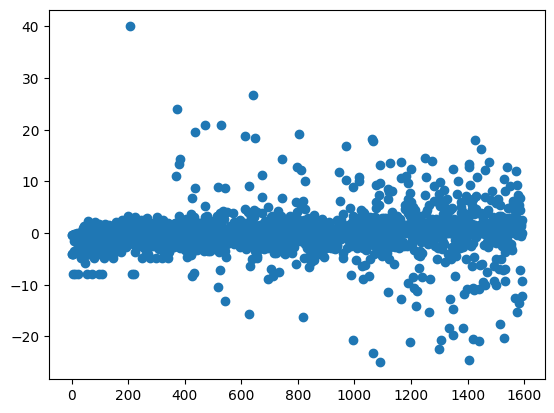

In [40]:
import matplotlib.pyplot as plt

plt.scatter(range(len(deltas)),deltas)

In [41]:
[f"{i%4}:{show_optimal_policy(state_policy)}" for i, state_policy in enumerate(action_values)]

['0:R',
 '1:R',
 '2:D',
 '3:L',
 '0:U',
 '1:L',
 '2:D',
 '3:L',
 '0:R',
 '1:D',
 '2:D',
 '3:L',
 '0:L',
 '1:R',
 '2:R',
 '3:L']

In [42]:
action_values = np.zeros((16,4))
action_values

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

episode: 0
exploring for state 0...
exploring for state 0...
exploring for state 0...
exploring for state 4...
exploring for state 8...
exploring for state 9...
exploring for state 13...
exploring for state 13...
exploring for state 9...
exploring for state 13...
exploring for state 14...
new epsilon 0.98505
episode: 1
exploring for state 0...
exploring for state 0...
exploring for state 1...
exploring for state 1...
exploring for state 2...
exploring for state 2...
exploring for state 6...
new epsilon 0.98012475
episode: 2
exploring for state 0...
exploring for state 4...
exploring for state 8...
exploring for state 8...
exploring for state 9...
exploring for state 8...
exploring for state 9...
exploring for state 13...
exploring for state 14...
new epsilon 0.97522412625
episode: 3
exploring for state 0...
exploring for state 4...
exploring for state 4...
new epsilon 0.97034800561875
episode: 4
exploring for state 0...
exploring for state 1...
exploring for state 2...
exploring for st

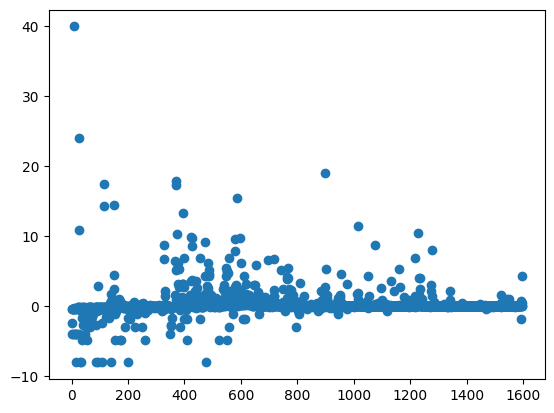

In [43]:
deltas = q_learning(env, action_values)

plt.scatter(range(len(deltas)),deltas)

In [44]:
[f"{i%4}:{show_optimal_policy(state_policy)}" for i, state_policy in enumerate(action_values)]

['0:D',
 '1:L',
 '2:D',
 '3:L',
 '0:D',
 '1:L',
 '2:D',
 '3:L',
 '0:R',
 '1:R',
 '2:D',
 '3:L',
 '0:L',
 '1:R',
 '2:R',
 '3:L']